In [0]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

from scipy.interpolate import InterpolatedUnivariateSpline

import ipywidgets as widgets
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

from IPython.display import clear_output

from ripser import ripser
from persim import plot_diagrams

def getSlidingWindow(x, dim, Tau, dT):
    """
    Return a sliding window of a time series,
    using arbitrary sampling.  Use linear interpolation
    to fill in values in windows not on the original grid
    Parameters
    ----------
    x: ndarray(N)
        The original time series
    dim: int
        Dimension of sliding window (number of lags+1)
    Tau: float
        Length between lags, in units of time series
    dT: float
        Length between windows, in units of time series
    Returns
    -------
    X: ndarray(N, dim)
        All sliding windows stacked up
    """
    N = len(x)
    NWindows = int(np.floor((N-dim*Tau)/dT))
    if NWindows <= 0:
        print("Error: Tau too large for signal extent")
        return np.zeros((3, dim))
    X = np.zeros((NWindows, dim))
    spl = InterpolatedUnivariateSpline(np.arange(N), x)
    for i in range(NWindows):
        idxx = dT*i + Tau*np.arange(dim)
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))+2
        # Only take windows that are within range
        if end >= len(x):
            X = X[0:i, :]
            break
        X[i, :] = spl(idxx)
    return X


In [2]:
!pip install ripser

In [0]:
#single sine maximum persistence vs window size

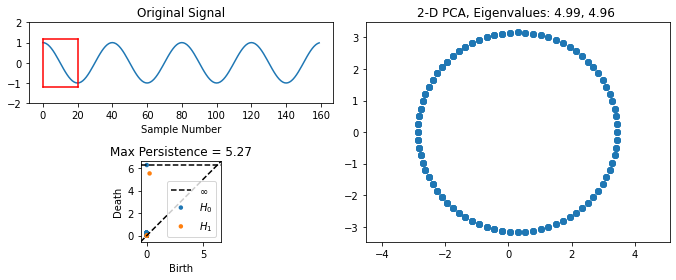

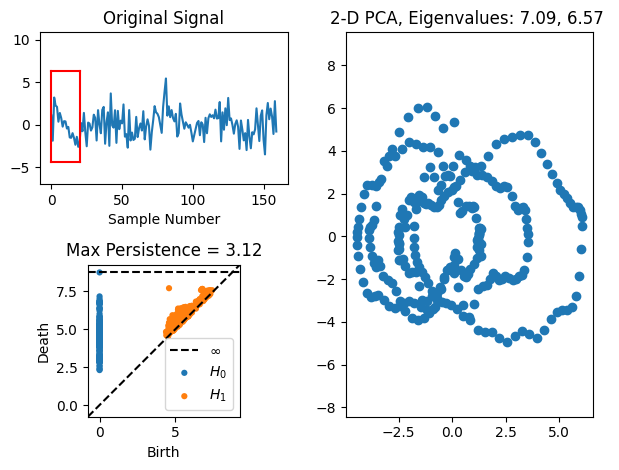

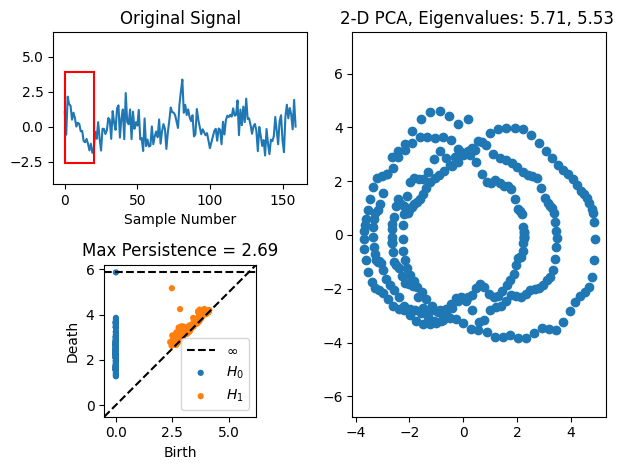

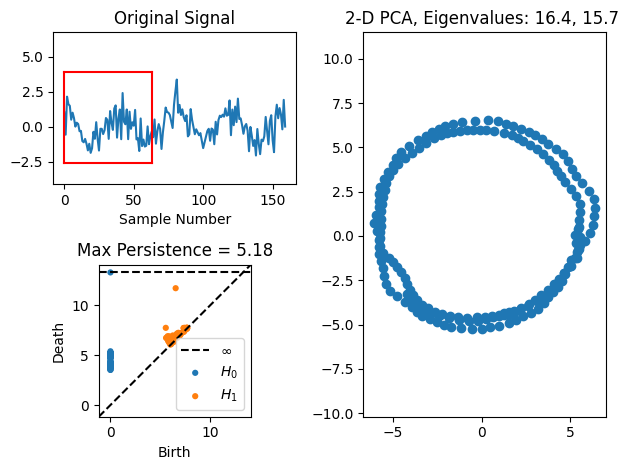

Error: Tau too large for signal extent


ValueError: ignored

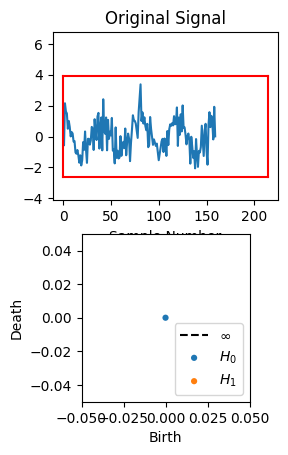

In [4]:
def on_value_change(change):
    execute_computation1()
    
dimslider = widgets.IntSlider(min=1,max=100,value=20,description='Dimension:',continuous_update=False)
dimslider.observe(on_value_change, names='value')

Tauslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')

noiseampslider = widgets.FloatSlider(min=0,max=2,step=0.1,value=0,description='Noise Amplitude',continuous_update=False)
noiseampslider.observe(on_value_change, names='value')

display(widgets.HBox(( dimslider,Tauslider, noiseampslider)))

noise = np.random.randn(10000)

fig = plt.figure(figsize=(9.5, 4))

def execute_computation1():
    plt.clf()
    # Step 1: Setup the signal
    T = 40 # The period in number of samples
    NPeriods = 4 # How many periods to go through
    N = T*NPeriods # The total number of samples
    t = np.linspace(0, 2*np.pi*NPeriods, N+1)[0:N] # Sampling indices in time
    x = np.cos(t) # The final signal
    x += noiseampslider.value * noise[:len(x)]
    
    # Step 2: Do a sliding window embedding
    dim = dimslider.value
    Tau = Tauslider.value
    dT = 0.5
    X = getSlidingWindow(x, dim, Tau, dT)
    extent = Tau*dim

    # Step 3: Do Rips Filtration
    PDs = ripser(X, maxdim=1)['dgms']
    I = PDs[1]

    # Step 4: Perform PCA down to 2D for visualization
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(X)
    eigs = pca.explained_variance_
    
    # Step 5: Plot original signal, 2-D projection, and the persistence diagram
    gs = gridspec.GridSpec(2, 2)
    ax = plt.subplot(gs[0,0])
    ax.plot(x)
    ax.set_ylim((2*min(x), 2*max(x)))
    ax.set_title("Original Signal")
    ax.set_xlabel("Sample Number")
    yr = np.max(x)-np.min(x)
    yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
    ax.plot([extent, extent], yr, 'r')
    ax.plot([0, 0], yr, 'r')     
    ax.plot([0, extent], [yr[0]]*2, 'r')
    ax.plot([0, extent], [yr[1]]*2, 'r')
    

    ax2 = plt.subplot(gs[1,0])
    plot_diagrams(PDs)
    plt.title("Max Persistence = %.3g"%np.max(I[:, 1] - I[:, 0]))
    
    ax3 = plt.subplot(gs[:,1])
    ax3.scatter(Y[:, 0], Y[:, 1])
    plt.axis('equal')
    plt.title("2-D PCA, Eigenvalues: %.3g, %.3g "%(eigs[0],eigs[1]))
    
    plt.tight_layout()
    
execute_computation1()


In [0]:
#two sines

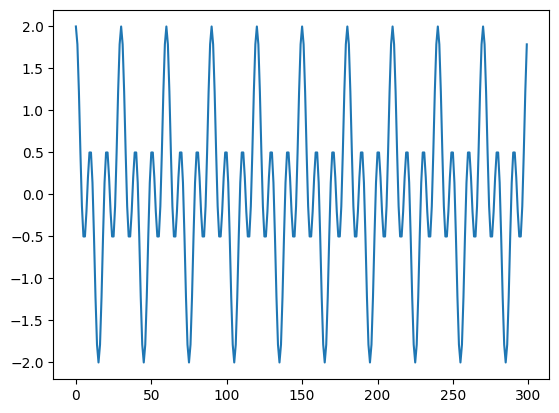

In [6]:
# Step 1: Setup the signal
T1 = 10 # The period of the first sine in number of samples
T2 = T1*3 # The period of the second sine in number of samples
NPeriods = 10 # How many periods to go through, relative to the second sinusoid
N = T2*NPeriods # The total number of samples
t = np.arange(N) # Time indices
x = np.cos(2*np.pi*(1.0/T1)*t) # The first sinusoid
x += np.cos(2*np.pi*(1.0/T2)*t) # The second sinusoid
plt.figure();
plt.plot(x);

In [0]:
#persistent homology

NotImplementedError: ignored

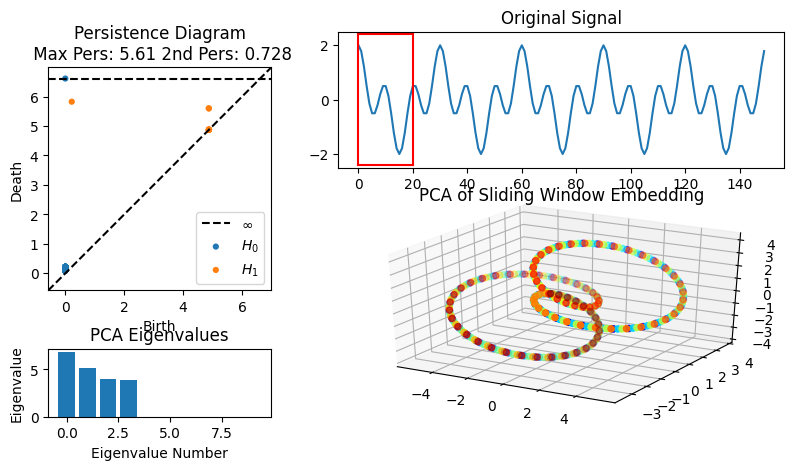

NotImplementedError: ignored

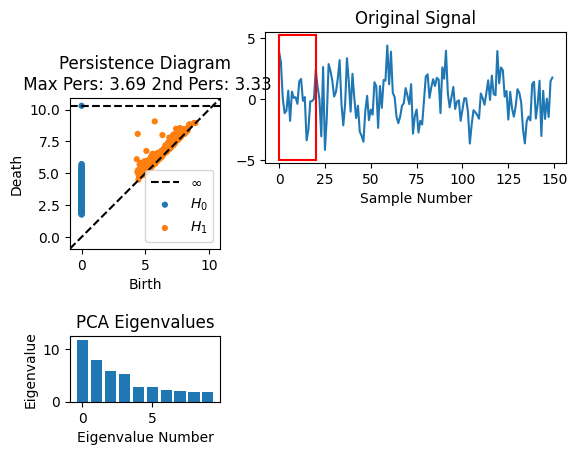

In [8]:
def on_value_change(change):
    execute_computation3()

secondfreq = widgets.Dropdown(options=[ 2, 3, np.pi],value=3,description='Second Frequency:',disabled=False)
secondfreq.observe(on_value_change,names='value')

noiseampslider = widgets.FloatSlider(min=0,max=2,step=0.1,value=0,description='Noise Amplitude',continuous_update=False)
noiseampslider.observe(on_value_change, names='value')

dimslider = widgets.IntSlider(min=1,max=100,value=20,description='Dimension:',continuous_update=False)
dimslider.observe(on_value_change, names='value')

Tauslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')

display(widgets.HBox(( dimslider,Tauslider)))
display(widgets.HBox(( secondfreq,noiseampslider)))

noise = np.random.randn(10000)

fig = plt.figure(figsize=(9.5, 5))

def execute_computation3():
    # Step 1: Setup the signal
    T1 = 10 # The period of the first sine in number of samples
    T2 = T1*secondfreq.value # The period of the second sine in number of samples
    NPeriods = 5 # How many periods to go through, relative to the second sinusoid
    N = T2*NPeriods # The total number of samples
    t = np.arange(N) # Time indices
    x = np.cos(2*np.pi*(1.0/T1)*t) # The first sinusoid
    x += np.cos(2*np.pi*(1.0/T2)*t) # The second sinusoid
    x += noiseampslider.value * noise[:len(x)]
    

    #Step 2: Do a sliding window embedding
    dim = dimslider.value
    Tau = Tauslider.value
    dT = 0.35
    X = getSlidingWindow(x, dim, Tau, dT)
    extent = Tau*dim

    #Step 3: Do Rips Filtration
    PDs = ripser(X, maxdim=1)['dgms']

    #Step 4: Perform PCA down to 2D for visualization
    pca = PCA()
    Y = pca.fit_transform(X)
    eigs = pca.explained_variance_

    #Step 5: Plot original signal and the persistence diagram
    gs = gridspec.GridSpec(3, 2,width_ratios=[1, 2],height_ratios=[2,2,1])
    
    ax = plt.subplot(gs[0,1])
    ax.plot(x)
    ax.set_ylim((1.25*min(x), 1.25*max(x)))
    ax.set_title("Original Signal")
    ax.set_xlabel("Sample Number")
    yr = np.max(x)-np.min(x)
    yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
    ax.plot([extent, extent], yr, 'r')
    ax.plot([0, 0], yr, 'r')     
    ax.plot([0, extent], [yr[0]]*2, 'r')
    ax.plot([0, extent], [yr[1]]*2, 'r')

    ax2 = plt.subplot(gs[0:2,0])
    plot_diagrams(PDs)
    maxind = np.argpartition(PDs[1][:,1]-PDs[1][:,0], -2)[-2:]
    max1 = PDs[1][maxind[1],1] -  PDs[1][maxind[1],0]
    max2 = PDs[1][maxind[0],1] -  PDs[1][maxind[0],0]
    ax2.set_title("Persistence Diagram\n Max Pers: %.3g 2nd Pers: %.3g"%(max1,max2) )

    ax3 = plt.subplot(gs[2,0])
    eigs = eigs[0:min(len(eigs), 10)]
    ax3.bar(np.arange(len(eigs)), eigs)
    ax3.set_xlabel("Eigenvalue Number")
    ax3.set_ylabel("Eigenvalue")
    ax3.set_title("PCA Eigenvalues")

    c = plt.get_cmap('jet')
    C = c(np.array(np.round(np.linspace(0, 255, Y.shape[0])), dtype=np.int32))
    C = C[:, 0:3]
    ax4 = fig.add_subplot(gs[1:,1], projection = '3d')
    ax4.set_title("PCA of Sliding Window Embedding")
    ax4.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=C)
    ax4.set_aspect('equal', 'datalim')
    
    plt.tight_layout()

execute_computation3()


In [0]:
#field of coefficients

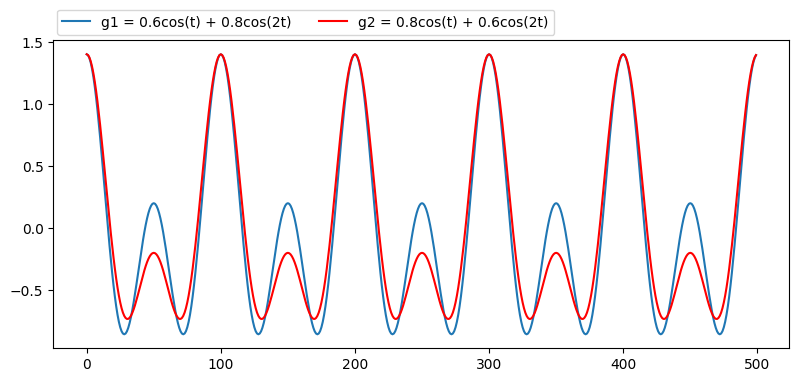

In [10]:
# Step 1: Setup the signal
T1 = 100 # The period of the first sine in number of samples
T2 = 50
NPeriods = 5 # How many periods to go through, relative to the first sinusoid
N = T1*NPeriods # The total number of samples
t = np.arange(N) # Time indices
coeff1 = 0.6
coeff2 = 0.8
g1 = coeff1*np.cos(2*np.pi*(1.0/T1)*t) # The first sinusoid
g1 += coeff2*np.cos(2*np.pi*(1.0/T2)*t) # The second sinusoid

g2 = coeff2*np.cos(2*np.pi*(1.0/T1)*t) # The first sinusoid
g2 += coeff1*np.cos(2*np.pi*(1.0/T2)*t) # The second sinusoid

fig = plt.figure(figsize=(9.5, 4))
plot1, = plt.plot(g1,label="g1 = %.2gcos(t) + %.2gcos(2t)"%(coeff1, coeff2))
plot2, = plt.plot(g2,color='r',label="g2 = %.2gcos(t) + %.2gcos(2t)"%(coeff2, coeff1));
plt.legend(handles=[plot1,plot2])
plt.legend(bbox_to_anchor=(0., 1.02, 0.69, .102), ncol=2);

NotImplementedError: ignored

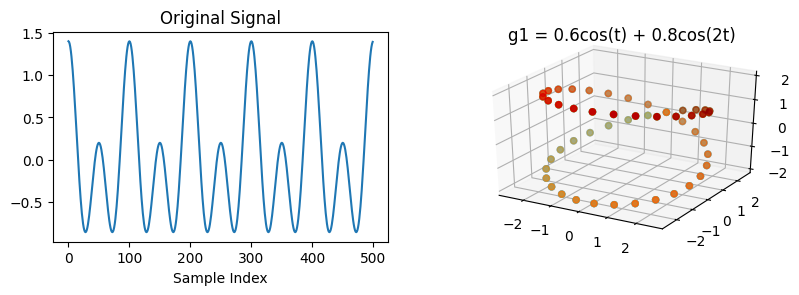

In [11]:
#Step 2: Do a sliding window embedding
dim = 20
Tau = 5
dT = 2
X1 = getSlidingWindow(g1, dim, Tau, dT)

#Step 3: Perform PCA down to 2D for visualization
pca = PCA()
Y = pca.fit_transform(X1)
eigs = pca.explained_variance_

c = plt.get_cmap('jet')
C = c(np.array(np.round(np.linspace(0, 255, Y.shape[0])), dtype=np.int32))
C = C[:, 0:3]

#Step 4: Plot original signal and PCA of the embedding
fig = plt.figure(figsize=(9.5,6))
ax = fig.add_subplot(221)
ax.plot(g1)
ax.set_title("Original Signal")
ax.set_xlabel("Sample Index")

ax2 = fig.add_subplot(222, projection = '3d')
ax2.set_title("g1 = %.2gcos(t) + %.2gcos(2t)"%(coeff1, coeff2))
ax2.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=C)
ax2.set_aspect('equal', 'datalim')

#####g2
X2 = getSlidingWindow(g2, dim, Tau, dT)
#Perform PCA down to 2D for visualization
pca = PCA()
Y = pca.fit_transform(X2)
eigs = pca.explained_variance_

ax = fig.add_subplot(223)
ax.plot(g2)
ax.set_title("Original Signal")
ax.set_xlabel("Sample Index")

ax2 = fig.add_subplot(224, projection = '3d')
ax2.set_title("g2 = %.2gcos(t) + %.2gcos(2t)"%(coeff2, coeff1))
ax2.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=C)
ax2.set_aspect('equal', 'datalim')
plt.tight_layout();

Computing persistence diagrams for g1...
Computing persistence diagrams for g2...


NameError: ignored

NotImplementedError: ignored

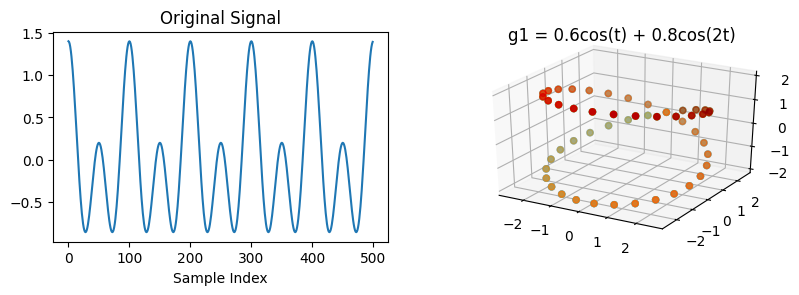

In [14]:
####g1
#Step 2: Do a sliding window embedding
dim = 20
Tau = 5
dT = 2
X1 = getSlidingWindow(g1, dim, Tau, dT)

#Step 3: Perform PCA down to 2D for visualization
pca = PCA()
Y = pca.fit_transform(X1)
eigs = pca.explained_variance_

c = plt.get_cmap('jet')
C = c(np.array(np.round(np.linspace(0, 255, Y.shape[0])), dtype=np.int32))
C = C[:, 0:3]

#Step 4: Plot original signal and PCA of the embedding
fig = plt.figure(figsize=(9.5,6))
ax = fig.add_subplot(221)
ax.plot(g1)
ax.set_title("Original Signal")
ax.set_xlabel("Sample Index")

ax2 = fig.add_subplot(222, projection = '3d')
ax2.set_title("g1 = %.2gcos(t) + %.2gcos(2t)"%(coeff1, coeff2))
ax2.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=C)
ax2.set_aspect('equal', 'datalim')

#####g2
X2 = getSlidingWindow(g2, dim, Tau, dT)
#Perform PCA down to 2D for visualization
pca = PCA()
Y = pca.fit_transform(X2)
eigs = pca.explained_variance_

ax = fig.add_subplot(223)
ax.plot(g2)
ax.set_title("Original Signal")
ax.set_xlabel("Sample Index")

ax2 = fig.add_subplot(224, projection = '3d')
ax2.set_title("g2 = %.2gcos(t) + %.2gcos(2t)"%(coeff2, coeff1))
ax2.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=C)
ax2.set_aspect('equal', 'datalim')
plt.tight_layout();

#Step 1: Do rips filtrations with different field coefficients
print("Computing persistence diagrams for g1...")
PDs1_2 = ripser(X1, maxdim=1, coeff=2)['dgms'] #Z2 Coefficients
PDs1_3 = ripser(X1, maxdim=1, coeff=3)['dgms'] #Z3 Coefficients
print("Computing persistence diagrams for g2...")
PDs2_2 = ripser(X2, maxdim=1, coeff=2)['dgms']
PDs2_3 = ripser(X2, maxdim=1, coeff=3)['dgms']


fig = plt.figure(figsize=(8, 6))

plt.subplot(231)
plt.plot(g1)

plt.subplot(232);
plot_diagrams(PDs1_2[1], labels=['H1'])
plt.title("$g_1$ Persistence Diagram $\mathbb{Z}/2\mathbb{Z}$")

plt.subplot(233);
plot_diagrams(PDs1_3[1], labels=['H1'])
plt.title("$g_1$ Persistence Diagram $\mathbb{Z}/3\mathbb{Z}$")

plt.subplot(234)
plt.plot(g2)

plt.subplot(235);
plot_diagrams(PDs2_2[1], labels=['H1'])
plt.title("$g_2$ Persistence Diagram $\mathbb{Z}/2\mathbb{Z}$")

plt.subplot(236);
plot_diagrams(PDs2_3[1])
plt.title("$g_2$ Persistence Diagram $\mathbb{Z}/3\mathbb{Z}$")

plt.tight_layout();